# Programming for Data Analysis
## Autumn 2021 Assignment
___

<br>

![NumPy_logo](Images/NumPy_logo.png)

## Introduction

This assignment deals with the python package **numpy.random**. It will give an overview of the package, then discuss some of its main components and functions including random number generation, permutations, and probability distributions.

<br> 

### NumPy

NumPy is the primary python library for working with arrays. The name itself comes from Numerical Python, and it has become the fundamental package for scientific computing and also the foundation for many other analytic libraries in the python language.

> "NumPy ... is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."  
https://en.wikipedia.org/wiki/NumPy

<br>

### numpy.random 

**numpy.random** is a module within the NumPy package which allows us to generate **pseudo-random** numbers and gives us a range of tools to manipulate them. Although there already is a random module in the Python standard library, numpy.random adds much extra functionality in particular in relation to arrays and has the ability to draw from a lot more statistical distributions. Computers can't really 'do random' - they need a set of instructions to produce an output - so programs like numpy.random use algorithims to generate random numbers. Thus they are not truly random but pseudo-random. This also means they are predictable and also reproducible with is of much benefit when running experimental code.  
The numpy.random module has been updated recently so I will be concentrating on the newer version and methods. All of the older methods are still supported however.

We begin by importing NumPy and all of the other libraries we are going to be using in the presentation. As per comvention and economy of space each is shortened as **np**, **plt**, etc.

In [1]:
# importing NumPy
import numpy as np

# importing matplotlib.pyplot for plotting and visualisations
import matplotlib.pyplot as plt

# for data analysis
import pandas as pd

# for plotting and visualisations
import seaborn as sns

In [2]:
# prints the styles available in matplotlib.pyplot
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# set global style for all plots
plt.style.use('_classic_test_patch')

# set global plot size
plt.rcParams['figure.figsize'] = (12,8)

<br>

NumPy creates random numbers through the use of a **BitGenerator** and a **Generator** - the BitGenerator generates random sequences of bits which are transformed into values by the generator using a variety of distributions. We can create a new constructor using the **default_rng** method to get a new instance of a generator.  

In [4]:
# using default_rng() to get a new random number generator
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7FE977858820

The default bitgenerator is PCG64 which is a 128-bit implementation of **O’Neill’s permutation congruential generator**.  
> "PCG is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict."  
https://www.pcg-random.org/index.html

We can pass a seed to the generator or let the computer pull a number from the operating system. More about that later!

<br>

**numpy.random.default_rng.random** returns floating point numbers. If no value is passed we get one randomly generated float between 0 and 1. If one value is passed we get an array of that length, and if a second value is passed (with extra brackets) we get a 2D array with those parameters.

In [5]:
# returns a single float
rng.random()

0.9955566881951969

In [6]:
# returns an array of 3 floats
rng.random(3)

array([0.0806421 , 0.73161333, 0.62433517])

In [7]:
# returns an array of 3x3 floats
rng.random((3,3))

array([[0.49669472, 0.29249268, 0.59560068],
       [0.82042282, 0.1953515 , 0.86211583],
       [0.02731035, 0.43581236, 0.59946674]])

<br>

**numpy.random.default_rng.integers** returns integers. If we pass 1 value, that will be the upper limit and non inclusive. 0 is the default lower limit. If we pass 2 values, the first will be the lower limit and the 2nd the upper. 3 values, and the third will be the amount of numbers creating an array.

In [8]:
# returns an integer between 0-9
rng.integers(10)

3

In [9]:
rng.integers(3,10)

7

In [10]:
# returns an array of 20 numbers between 2-9
rng.integers(2,10,20)

array([6, 3, 6, 2, 9, 7, 8, 7, 5, 6, 3, 8, 9, 6, 9, 8, 4, 8, 7, 2])

For all of the above code, if we rerun it we will get different results each time. If we want reproducible results we need to pass in a **seed**. We will look at this in more detail later.

<br>

#### Permutations

<br>

Within the numpy.random library there are many methods we can use to randomly manipulate the generated or given data. **permutation()** and **shuffle()** both rearrange the order of an array. The main difference is that permutation creates a new array while shuffle alters the original array.

In [11]:
# creating an array of numbers 1 to 10
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# random permutation
rng.permutation(arr)

array([8, 7, 1, 3, 5, 6, 4, 9, 2])

In [12]:
# the original array is intact
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# 'shuffles' the array and alters the original
rng.shuffle(arr)
arr

array([3, 7, 5, 1, 4, 2, 9, 8, 6])

We can use permutation to create a random array from a range

In [14]:
# creates a permutation of the numbers 0-19
print(rng.permutation(20))

[ 4  1 19  7 15  2  3  8 14  9 17 11 16  6 10  0  5 12 18 13]


We can also use it on 2 dimensional arrays. Interestingly it maintains the numbers and order within each row and only rearranges the actual rows. If we add the parameter axis=1 we can permutate within the rows also

In [15]:
# creates 12 numbers and shapes them into a 3x4 arrany
array = np.arange(12).reshape((3, 4))
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
# permutates the 2D array - rows only
rng.permutation(array)

array([[ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [17]:
# permutates the 2D array - rows and within rows
rng.permutation(array, axis=1)

array([[ 1,  3,  2,  0],
       [ 5,  7,  6,  4],
       [ 9, 11, 10,  8]])

In [18]:
# just to confirm the original array is intact
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can do the same using the shuffle method - again the main difference being shuffle alters the original array.

In [19]:
# shuffles the array
rng.shuffle(array, axis=1)
array

array([[ 2,  0,  3,  1],
       [ 6,  4,  7,  5],
       [10,  8, 11,  9]])

In [20]:
# just to confirm the array is now altered
array

array([[ 2,  0,  3,  1],
       [ 6,  4,  7,  5],
       [10,  8, 11,  9]])

<br>

A few other interesting methods available to us

**numpy.random.default_rng.choice** generates a random sample from a given array. The first value in brackets is the upper range, while the 2nd is the number of values returned.

In [21]:
# choose 7 numbers at random from the range 0-39
rng.choice(40, 15)

array([ 9, 36,  7, 27, 18,  3, 21, 14, 22,  2, 14, 15, 18, 33, 33])

**numpy.random.default_rng.bytes** returns random bytes

In [22]:
# returns 10 random bytes!
rng.bytes(10)

b'\x0eD\xa3\xd2\x9e(\x08\xe2\x16\x05'

<br>

### simple guessing game

A little game for fun using numpy.random!

In [64]:
# Generate a random integer between 1 and 10
randomNumber = rng.integers(1,10)
# Ask the player to pick a number
yourChoice = int(input("Pick a number between 1 and 10: "))
# Compare the numbers
if compChoice == yourChoice:
    # If correct
    print("Well done - you guessed right")
else:
    # otherwise
    print("Unlucky - you guessed wrong!")

Pick a number between 1 and 10:  10


Unlucky - you guessed wrong!


### 

<br>

## Distributions
___

Probability distributions are how values are distributed within a given range or criteria. I will go through several of the more common examples.

### Uniform Distribution

![NumPy_logo](Images/dice.jpeg)

This is where each event has an equal chance of occurring, such as rolling a single dice or choosing a particular playing card from the deck.  
The default parameters are 0.0 and 1.0, with the upper value being non-inclusive. The uniform distribution dictates that the returned value has an equal chance of falling at any point between the 2 parameters.

In [25]:
# return a floating point number between 0.0 and 1.0 (not including 1)
rng.uniform()

4.4667966211608956e-05

We can pass some parameters in then. One value specifies the upper limit (non-inclusive)

In [26]:
# returns a floating point number between 0.0 and 4.0
rng.uniform(4)

1.9817113234643147

When we pass 2 values, the first is the lower limit (inclusive) and the second the upper (non-inclusive).

In [27]:
# return a floating point number between 3.0 and 4.0
rng.uniform(3,4)

3.6888736648218607

We can create a 2D array using the **size** parameter.

In [28]:
# returns a 2D (4x3) array of floating point numbers between 10.0 and 15.0
rng.uniform(10, 15, size=(4, 3))

array([[10.12310827, 12.83281298, 10.83701049],
       [14.09339993, 13.34724712, 14.95767906],
       [11.52349492, 10.82593016, 13.70121497],
       [13.66466276, 14.48842988, 14.26714613]])

<br>

#### Sample size

It's difficult to appreciate uniform distribution unless we increase the sample size. The following code creates various sizes of arrays of values between 0 and 100. In theory there's an equal chance for each value to occur but this only becomes obvious when we increase the sample size. The set of plots below demonstrate that clearly. The final plot which has a sample of 1 million values is nearly a straight line.  

In [29]:
# looking at the difference the sample size makes
x = rng.integers(100, size = 10)
y = rng.integers(100, size = 100)
z = rng.integers(100, size = 1000)
a = rng.integers(100, size = 10000)
b = rng.integers(100, size = 100000)
c = rng.integers(100, size = 1000000)

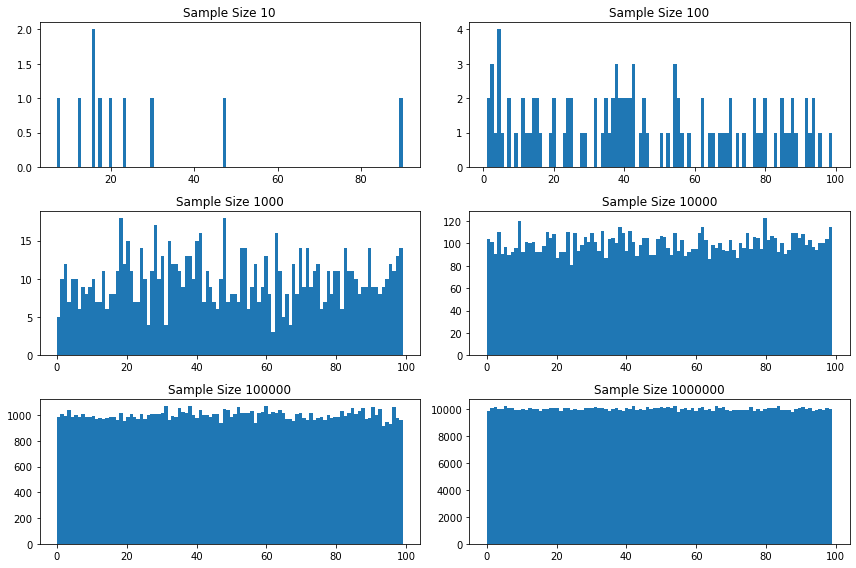

In [30]:
# plt.subplots(3,2) creates 3 rows and 2 columns of plots
# axs[0,0] etc. specifies where this plot goes in the arrangement
fig, axs = plt.subplots(3,2)
axs[0,0].hist(x, bins=100)
axs[0,0].set_title('Sample Size 10')
axs[0,1].hist(y, bins=100)
axs[0,1].set_title('Sample Size 100')
axs[1,0].hist(z, bins=100)
axs[1,0].set_title('Sample Size 1000')
axs[1,1].hist(a, bins=100)
axs[1,1].set_title('Sample Size 10000')
axs[2,0].hist(b, bins=100)
axs[2,0].set_title('Sample Size 100000')
axs[2,1].hist(c, bins=100)
axs[2,1].set_title('Sample Size 1000000')
# creates space between each of the subplots
fig.tight_layout()

<br>

### Normal distribution

![Normal_Dist](Images/normal-distribution-function-example_dmeldy.png)

Normal distribution represents the behavior of most of the situations in the universe - that's why it’s called a “normal” distribution I guess! It's also known as Gaussian Distribution or Bell Curve, and is one of the widest used distributions. It represents things like IQ Scores and heartbeats among others.   
The parameters are as follows:
1) mean - peak of the bell curve
2) standard deviation - distance from the mean
3) size - shape of the array  

We use the **numpy.random.normal()** function. If no paremters are passed, a single value will be returned using a mean of 0 and standard deviation of 1. This is actually known as standard normal distribution and numpy.random has a separate **standard_random()** function which only takes a size as a parameter and leaves the mean and standard at 0 and 1 respectively.  

In [31]:
rng.normal()

-0.5386924966032309

Here we'll create an array using standard_normal().

In [32]:
# returns an array of 40 random normally distributed numbers using a mean of 0 and SD of 1
rng.standard_normal(40)

array([ 1.54302084,  0.96641653, -0.04010726, -0.3498332 ,  0.16735209,
       -1.70284058, -0.46285312, -0.71876466,  0.34983208, -0.74075228,
        0.48710964,  0.27968514,  0.57568363,  0.52961302,  0.33943842,
       -1.10432741, -1.57380225,  0.8839873 ,  0.34027689,  0.45064356,
        0.59346031, -0.86420494,  0.57404709, -1.20462302, -1.03450271,
       -0.56119478,  1.34769127, -0.39111243, -0.21953657,  1.3368008 ,
        1.54403343,  1.03550597,  1.55976456,  1.25501696,  0.13580917,
        1.3093653 ,  1.07197262, -0.00823436,  0.8752932 , -0.71285266])

In [33]:
# specifying the mean as 4.0
z = rng.normal(loc=4, size=100)
z

array([3.8794624 , 2.53521876, 3.05040766, 2.99805595, 4.61607743,
       4.8395202 , 4.28467789, 5.21337111, 3.43853886, 2.72637033,
       2.94709953, 3.043007  , 4.06770857, 4.33441213, 5.06663295,
       2.97291374, 3.21785185, 5.33919423, 2.29263836, 4.18810607,
       3.36782276, 3.83744316, 4.50966789, 2.98267272, 5.76432129,
       4.39782639, 3.12809221, 3.84314762, 3.58477841, 4.0130072 ,
       3.86846251, 3.17926793, 4.97828659, 4.69458173, 4.35826432,
       4.64813903, 3.7669247 , 2.66678936, 3.62142898, 3.4687519 ,
       3.36729172, 3.09577096, 5.18316645, 3.71922743, 4.9956127 ,
       6.01449396, 3.14525333, 4.04974008, 1.95956043, 3.87256774,
       2.96672802, 3.82628291, 1.91812162, 3.27752501, 4.23067705,
       4.36590499, 3.62713999, 5.72368999, 4.8326973 , 3.99670125,
       4.74012746, 3.24184287, 3.67117399, 4.64468406, 3.66339508,
       4.15492621, 5.4316903 , 4.25207873, 4.31373094, 3.32418802,
       2.73019587, 4.70315887, 2.65366526, 3.8241373 , 3.12963

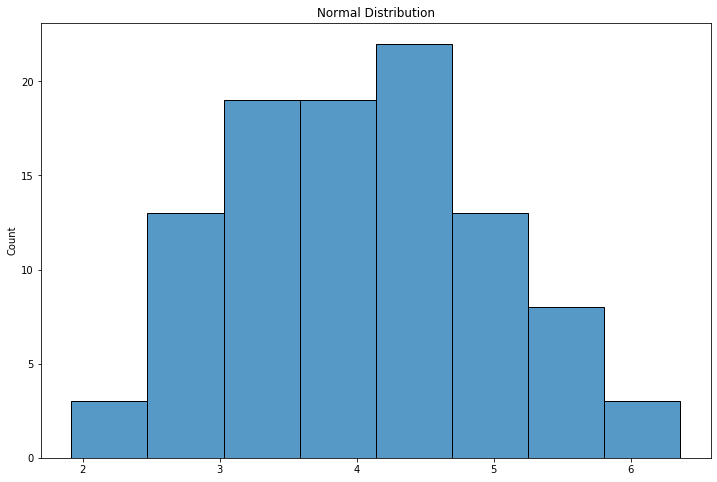

In [34]:
# creates a histogram for z
sns.histplot(z).set_title("Normal Distribution");

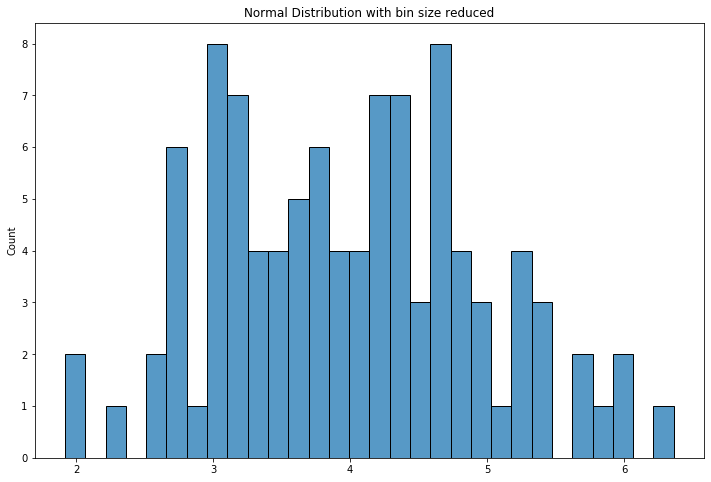

In [35]:
# specifies the bins which smoothes things out
# plt.title("Normal Distribution with bin size reduced") 
# # plt.hist(z, bins=20);
sns.histplot(z, bins=30).set_title("Normal Distribution with bin size reduced");

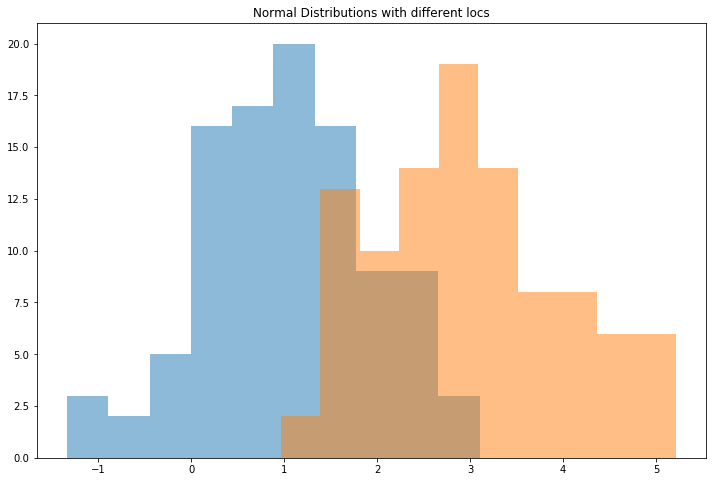

In [36]:
# looking at changing the loc (mean)
x = rng.normal(loc=1.0, size=100)
y = rng.normal(loc=3.0, size=100)
fig, ax = plt.subplots()

# plotting both on the same axis
# alpha is transparency
plt.title("Normal Distributions with different locs") 
ax.hist(x, bins=10, alpha=0.5)
ax.hist(y, bins=10, alpha=0.5);

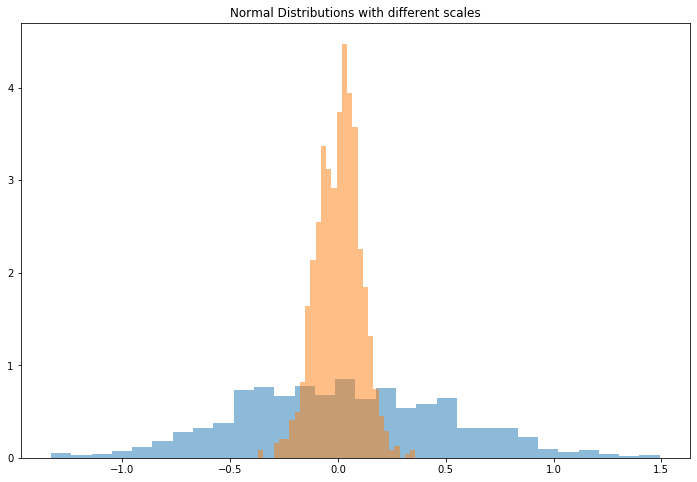

In [37]:
# looking at changing the scale (standard deviation)
x = rng.normal(scale=0.5, size=1000)
y = rng.normal(scale=0.1, size=1000)
fig, ax = plt.subplots()

# plotting both on the same axis
# alpha is transparency
plt.title("Normal Distributions with different scales") 
ax.hist(x, bins=30, alpha=0.5, density=True)
ax.hist(y, bins=30, alpha=0.5, density=True);

KDE - kernal density estimation is a useful tool in visualing normal distributions. It smooths out the curves by estimating all of the values in between.

Text(0.5, 1.0, 'Normal Distribution with KDE')

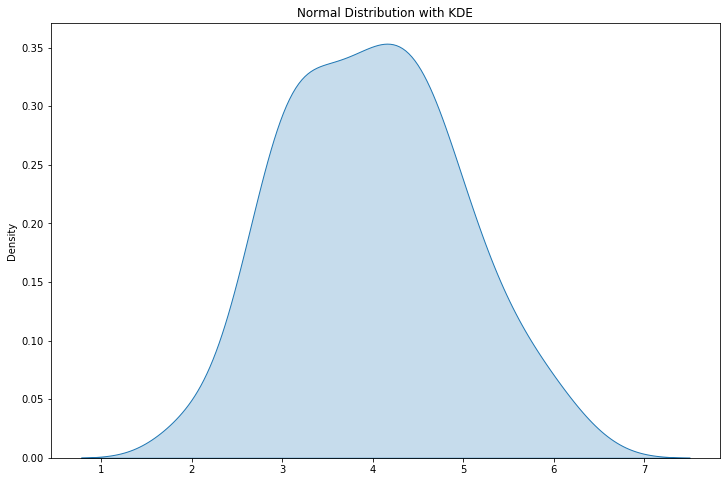

In [38]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(data=z, fill=True).set_title('Normal Distribution with KDE')

We can do a similar demonstration to above to show how the sample size affects the outcome. We use the default paramters of mean=0 and SD=1 and create arrays between 10 and 1,000,000. Again the higher the sample size the more perfect the bell shaped curve. 

In [39]:
x = rng.standard_normal(10)
y = rng.standard_normal(100)
z = rng.standard_normal(1000)
a = rng.standard_normal(10000)
b = rng.standard_normal(100000)
c = rng.standard_normal(1000000)

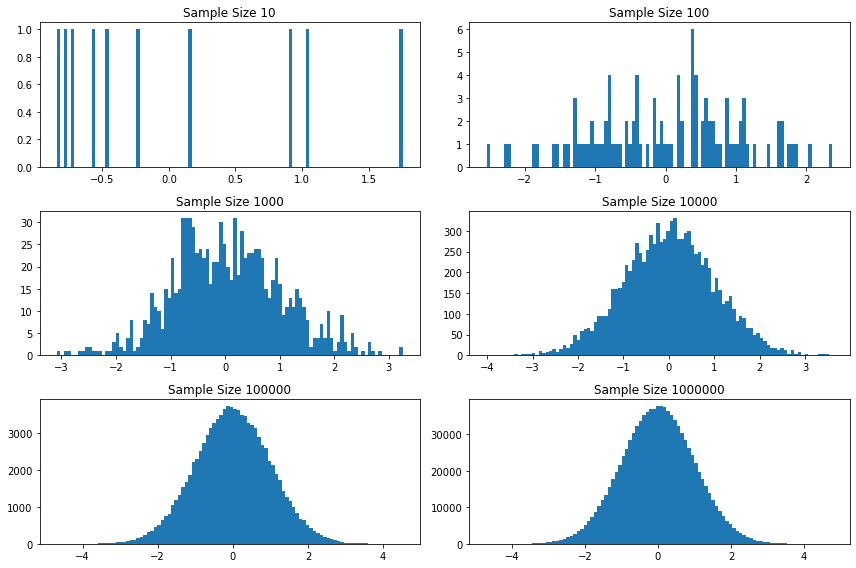

In [40]:
# plt.subplots(3,2) creates 3 rows and 2 columns of plots
# axs[0,0] etc. specifies where this plot goes in the arrangement
fig, axs = plt.subplots(3,2)
axs[0,0].hist(x, bins=100)
axs[0,0].set_title('Sample Size 10')
axs[0,1].hist(y, bins=100)
axs[0,1].set_title('Sample Size 100')
axs[1,0].hist(z, bins=100)
axs[1,0].set_title('Sample Size 1000')
axs[1,1].hist(a, bins=100)
axs[1,1].set_title('Sample Size 10000')
axs[2,0].hist(b, bins=100)
axs[2,0].set_title('Sample Size 100000')
axs[2,1].hist(c, bins=100)
axs[2,1].set_title('Sample Size 1000000')
# creates space between each of the subplots
fig.tight_layout()

<br>

### Binomial Distribution

Binomial distribution is when we're dealing with only 2 outcomes. These can be equal (0.5) such as a coin toss as demomstrated below, or any probability inserted as a parameter.  
The syntax is demonstrated below where n = the number of trials and and p = the probability of success for either outcome.

In [41]:
# simple example which returns either 0 or 1
rng.binomial(n=1, p=0.5)

0

#### Coin toss simulation

![NumPy_logo](Images/coinToss4.jpg)

The following code simulates tossing a coin 1000 times with the results shown in a bar chart

In [42]:
# n = number of trials, p = probability of success for each trial
# s = result of tossing the coin 1000 times
s = rng.binomial(n=1, p=0.5, size=1000)
s

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,

<BarContainer object of 2 artists>

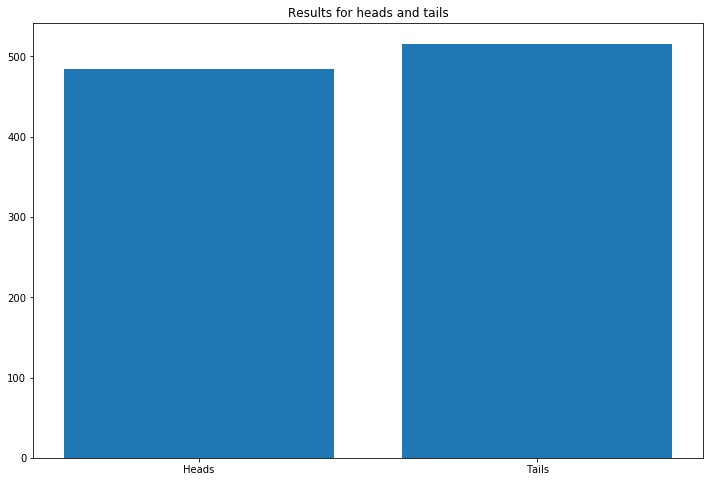

In [43]:
# creating a bar chart to visualise the results
plt.title("Results for heads and tails") 
plt.bar(['Heads', 'Tails'], [s.size - s.sum(), s.sum()])

We're going to change the probability slightly here by using the example of drawing a heart from a deck of cards. There's a 1 in 4 chance of that happening so we insert 0.25 into the code and run it 1000 times.

In [44]:
# change the probability to 0.25 to simulate choosing a heart from a deck of cards!
s = rng.binomial(n=1, p=0.25, size=1000)

We're going to visualise that using seaborn this time. A bit prettier!

Text(0.5, 1.0, 'Results for not-hearts and hearts')

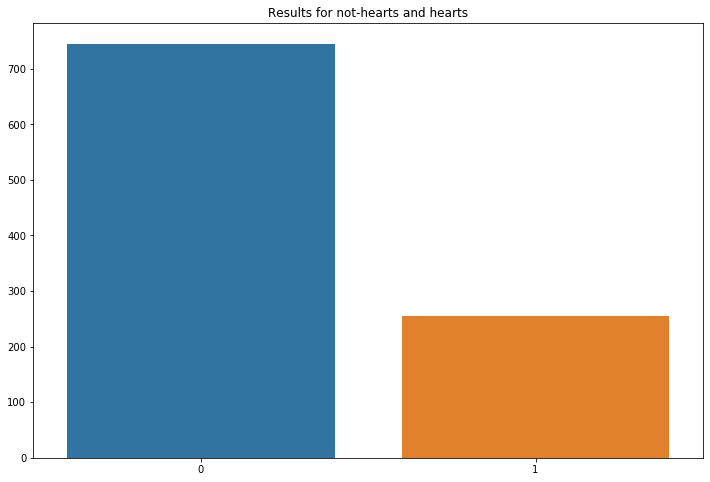

In [45]:
unique, counts = np.unique(s, return_counts=True)
sns.barplot(x=unique, y=counts).set_title("Results for not-hearts and hearts")

Back to the coins! This simulates tossing the coin 10 times and counting the success of either heads or tails, then repeating that 1000 times.

In [46]:
u = rng.binomial(n=10, p=0.5, size=1000)
u

array([ 3,  7,  6,  8,  3,  2,  4,  2,  4,  7,  2,  8,  5,  1,  8,  7,  4,
        3,  4,  5,  2,  5,  7,  6,  4,  6,  6,  4,  5,  4,  3,  5,  9,  3,
        7,  6,  8,  4,  5,  5,  4,  7,  4,  4,  4,  5,  4,  5,  4,  6,  5,
        1,  6,  7,  5,  8,  5,  7,  7,  4,  3,  3,  6,  6,  6,  6,  6,  5,
        8,  7,  7,  5,  6,  5,  4,  5,  3,  3,  6,  6,  5,  5,  6,  7,  4,
        6,  5,  6,  6,  7,  5,  3,  5,  5,  5,  3,  3,  5,  8,  6,  6,  4,
        9,  4,  5,  4,  6,  5,  5,  6,  5,  4,  7,  5,  6,  6,  4,  6,  4,
        6,  6,  5,  4,  5,  5,  5,  5,  3,  5,  5,  4,  3,  5,  8,  6,  5,
        3,  6,  0,  6,  4,  4,  8,  4,  3,  4,  7,  5,  4,  4,  4,  5,  7,
        4,  4,  3,  5,  2,  4,  3,  5,  4,  7,  6,  4,  6,  8,  3,  6,  5,
        5,  7,  3,  6,  7,  4,  3,  6,  4,  7,  5,  3,  5,  5,  2,  3,  5,
        7,  2,  2,  6,  6,  5,  2,  5,  4,  5,  5,  3,  6,  4,  6,  5,  6,
        8,  5,  3,  5,  7,  3,  6,  5,  6,  6,  3,  6,  4,  4,  4,  1,  6,
        6,  5,  3,  7,  6

We plot this using a bar chart, but first we have to isolate the unique values using NumPy's **unique** function, and the counts for each.

In [47]:
unique, counts = np.unique(u, return_counts=True)
unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Text(0.5, 1.0, 'Results for 10 coin tosses, 1000 times')

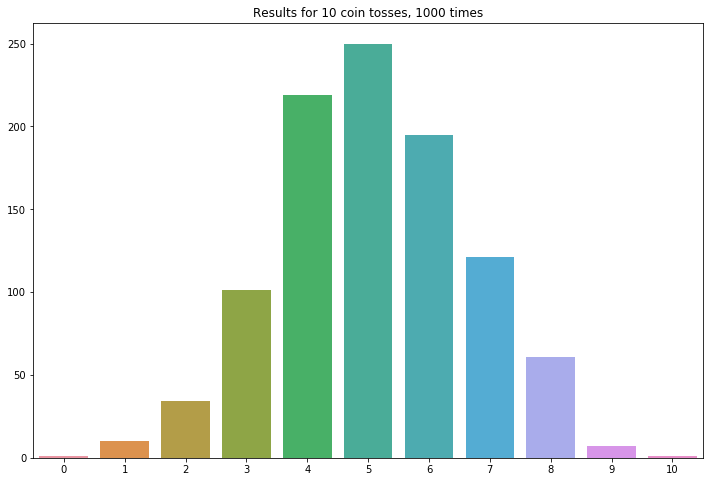

In [48]:
# creating a barplot
sns.barplot(x=unique,y=counts).set_title("Results for 10 coin tosses, 1000 times") 

<br>

![NumPy_logo](Images/piano.jpeg)

A contrived real world example from my other life! A blind man walks into a room with a piano and randomly plays a note - what are the chances of him **not** playing a C? There are 11 Cs out of 88 notes so that is a probability of 1/8 or 0.125. What is the probability of him missing the C if he repeats it 5 times?  
We do 10000 trials of the model, and count the number that generate zero positive results.

In [49]:
# 5 trials, .125 probability, repeated 10000 times
sum(rng.binomial(5, 0.125, 10000) == 0)/10000.

0.5048

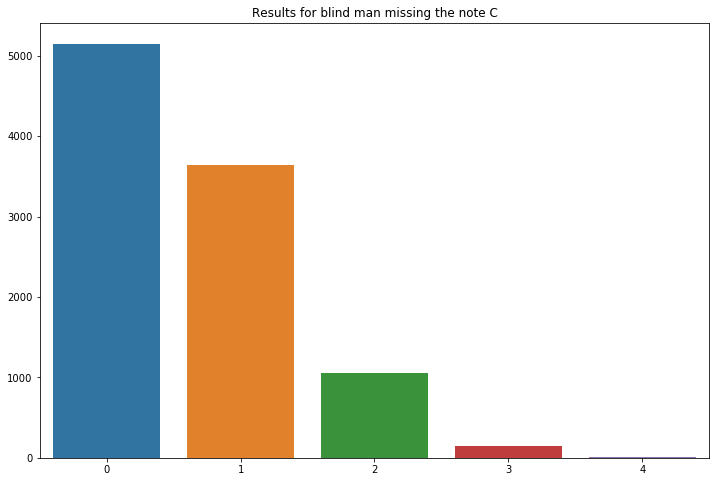

In [50]:
# to visualise that
a = rng.binomial(5, 0.125, 10000)
unique, counts = np.unique(a, return_counts=True)
sns.barplot(x=unique, y=counts).set_title("Results for blind man missing the note C");

___

<br>

### Poisson Distribution

Poisson Distribution can be used to simulate number of 'events' occuring in specific intervals when the average freqency rate is known and is not dependent on the previous occurances. The following is a good example from wikipedia:  
>"... a call center receives an average of 180 calls per hour, 24 hours a day. The calls are independent; receiving one does not change the probability of when the next one will arrive. The number of calls received during any minute has a Poisson probability distribution: the most likely numbers are 2 and 3 but 1 and 4 are also likely and there is a small probability of it being as low as zero and a very small probability it could be 10.  
https://en.wikipedia.org/wiki/Poisson_distribution

The basic syntax is demonstrated below where the first parameter is the average number of events and the second the amount of values returned. 

In [51]:
# 5 is average number of events, 10 is the amount returned
rng.poisson(5,10)

array([8, 5, 5, 7, 5, 3, 2, 3, 1, 3])

I'm going to try and simulate people going to the pub between 6pm and 11.30 today! Obviously there are many other factors which may influence this but this will show the code!

In [52]:
# creates the range and time interval
range = pd.date_range("18:00", "23:30", freq="15min")
range

DatetimeIndex(['2021-11-17 18:00:00', '2021-11-17 18:15:00',
               '2021-11-17 18:30:00', '2021-11-17 18:45:00',
               '2021-11-17 19:00:00', '2021-11-17 19:15:00',
               '2021-11-17 19:30:00', '2021-11-17 19:45:00',
               '2021-11-17 20:00:00', '2021-11-17 20:15:00',
               '2021-11-17 20:30:00', '2021-11-17 20:45:00',
               '2021-11-17 21:00:00', '2021-11-17 21:15:00',
               '2021-11-17 21:30:00', '2021-11-17 21:45:00',
               '2021-11-17 22:00:00', '2021-11-17 22:15:00',
               '2021-11-17 22:30:00', '2021-11-17 22:45:00',
               '2021-11-17 23:00:00', '2021-11-17 23:15:00',
               '2021-11-17 23:30:00'],
              dtype='datetime64[ns]', freq='15T')

In [53]:
# new dataframe with random poisson distributed data to simulate pub punters
# 20 is the average number of admissions per 30min interval
punters = rng.poisson(20, len(range))

# index is timeseries created above
punterSchedule = pd.DataFrame(punters, index=range,columns=['New Punters'])
punterSchedule

,New Punters
2021-11-17 18:00:00,25
2021-11-17 18:15:00,22
2021-11-17 18:30:00,16
2021-11-17 18:45:00,20
2021-11-17 19:00:00,18
2021-11-17 19:15:00,20
2021-11-17 19:30:00,16
2021-11-17 19:45:00,15
2021-11-17 20:00:00,26
2021-11-17 20:15:00,27


The lineplot below uses seaborn to visualise this

[Text(0.5, 1.0, 'Poisson Distribution of people entering the pub this evening')]

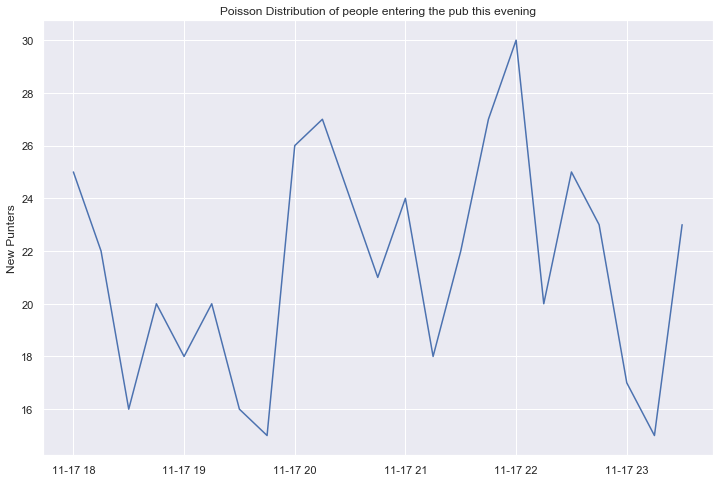

In [54]:
# creates a seaborn lineplot
sns.set(style="darkgrid")
sns.lineplot(x=range, y='New Punters', data = punterSchedule).set(title='Poisson Distribution of people entering the pub this evening')

<br>

### Exponential Distribution

![NumPy_logo](Images/exponential-distribution-function-example_dt13le.png)

Exponential distribution is a continuous distribution that is commonly used to measure the expected time for an event to occur, or time until the next event. For example, the amount of time, beginning now, until a volcano errupts. They are commonly used in calculations of product reliability, or the length of time a product lasts.  
It is closely linked with Poisson distribution in that it can describe "the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate." https://www.datacamp.com/community/tutorials/probability-distributions-python

There are 2 optional parameters:  
1) scale
2) size

If no parameter is passed we get a single value from an exponential distribution. The default value for scale is 0.

In [55]:
rng.exponential()

0.3514638757026956

In [56]:
x = rng.exponential(3, 10000)
x

array([0.44861294, 3.77314732, 0.37689603, ..., 0.07745658, 1.37980556,
       1.64289248])

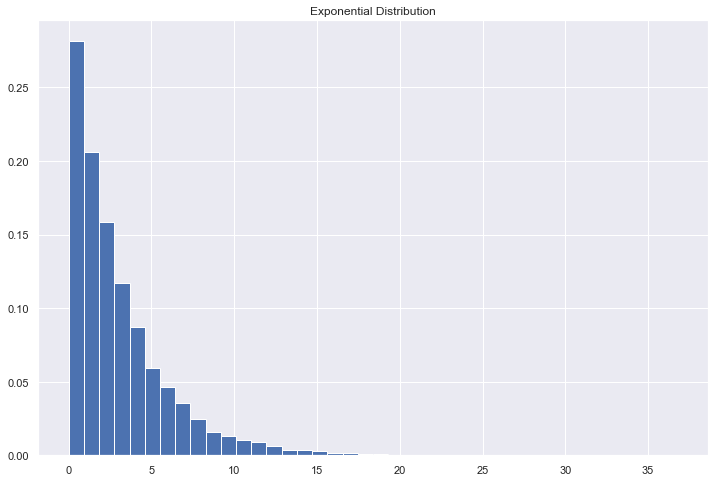

In [57]:
# histogram to visualise
count, bins, ignored = plt.hist(x, 40, density = True)
plt.title("Exponential Distribution") 
plt.show()

<br>

## The use of seeds in generating pseudorandom numbers

>"Pseudorandomness is a sample of numbers that look close to random, but were generated using a deterministic process."
https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

<br>

As mentioned above, numbers returned using numpy.random module are not truly random at all. In fact computers dont't really do random that well! They are what is known as pseudo-random numbers - basically numbers that appear to be random but actually aren't. They are predetermined using algorithims, one of the benefits of which is that they are repeatable and reproducible which aids in all sorts of investigative coding and testing.
The seed is what numpy uses to generate the 'random' numbers - if we pass the seed to the NumPy pseudo-random number generator, every time we run the code we get the same result. Or we can let numpy generate one, and we won't get the same results each time. The following code demonstrates both situations.

In [58]:
# Every time we run this code we will get the same array
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))

[5 0 3 3 7]
[5 0 3 3 7]
[5 0 3 3 7]


In [59]:
# Whereas every time we run this code we will get a different array
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))

[9 3 5 2 4]
[7 6 8 8 1]
[6 7 7 8 1]


The actual number passed to the seed function doesn't really matter, but we need to be aware that changing the number will change the output. The following code demonstrates this:

In [60]:
# The first 2 of these will always produce will always produce the same float but different from each other
np.random.seed(0)
print(np.random.random())

np.random.seed(1)
print(np.random.random())

# This will always produce a different number
np.random.seed()
print(np.random.random())

0.5488135039273248
0.417022004702574
0.4390958972548107


The seed function can be used in conjunction with all of the other functions and wrappers already mentioned above, and is essential if your results need to be reproducible and shareable.

___


<br>

## References/Sources/Links

NumPy - Wikipedia
https://en.wikipedia.org/wiki/NumPy

numpy.random.Generator.poisson – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson

numpy.random.Generator.exponential – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

numpy.random.Generator.normal – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

numpy.random – official documentation
https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random

numpy.random.Generator.uniform – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

NumPy Random Seed, Explained, by Joshua Ebner - www.sharpsightlabs.com
https://www.sharpsightlabs.com/blog/numpy-random-seed/ 

numpy.random.Generator.binomial – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

What is NumPy? – official documentation
https://numpy.org/doc/stable/user/whatisnumpy.html

Python NumPy Random, by Bijay Kumar - pythonguides.com
https://pythonguides.com/python-numpy-random/

Random Numbers in NumPy - www.w3schools.com
https://www.w3schools.com/python/numpy/numpy_random.asp

Random Generator – official documentation
https://numpy.org/doc/stable/reference/random/generator.html

numpy.random.Generator.choice – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice

numpy.random.Generator.permutation – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation

numpy.random.Generator.shuffle – official documentation
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

# END